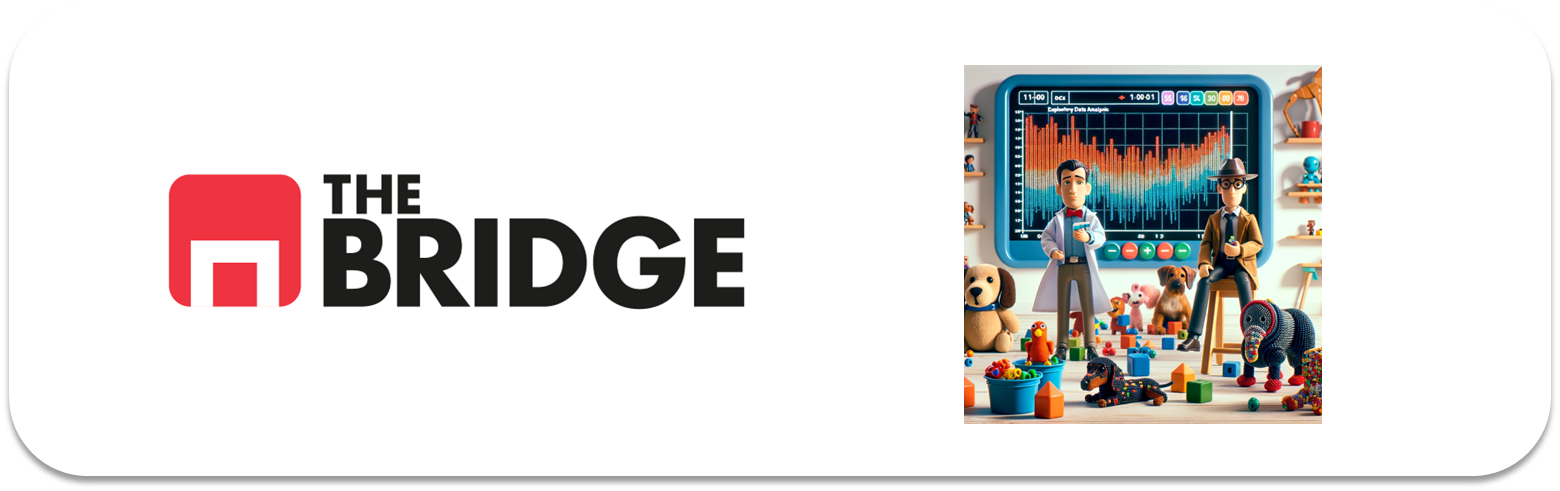

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr
from scipy import stats


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [170]:
df=pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [171]:
df.drop(columns=["deck","survived","pclass","embarked"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


In [172]:
df.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [173]:
df["family_members"]=df["sibsp"]+df["parch"]
df.drop(columns=["sibsp","parch"], inplace=True)
df.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [174]:
moda=df["embark_town"].mode()[0]

df["embark_town"].fillna(moda, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [175]:
df.describe()

,age,fare,family_members
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.904602
std,14.526497,49.693429,1.613459
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [176]:
# Calculo las medias, por categoria "who", no me lo mantiene

media_child=df.loc[df["who"]=="child"]["age"].mean()
media_man=df.loc[df["who"]=="man"]["age"].mean()
media_woman=df.loc[df["who"]=="woman"]["age"].mean()
print(round(media_child,1), round(media_woman,1),round(media_man,1))
df.loc[df["who"]=="child","age"].fillna( round(media_child, 1), inplace=True)
df.loc[df["who"]=="child","age"].fillna( round(media_man, 1), inplace=True)
df.loc[df["who"]=="child","age"].fillna( round(media_woman, 1), inplace=True)
df.sample(20)

6.4 32.0 33.2


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
591,female,52.0,78.2667,First,woman,False,Cherbourg,yes,False,1
93,male,26.0,20.5750,Third,man,True,Southampton,no,False,3
745,male,70.0,71.0000,First,man,True,Southampton,no,False,2
602,male,NaN,42.4000,First,man,True,Southampton,no,True,0
365,male,30.0,7.2500,Third,man,True,Southampton,no,True,0
748,male,19.0,53.1000,First,man,True,Southampton,no,False,1
196,male,NaN,7.7500,Third,man,True,Queenstown,no,True,0
338,male,45.0,8.0500,Third,man,True,Southampton,yes,True,0
272,female,41.0,19.5000,Second,woman,False,Southampton,yes,False,1
126,male,NaN,7.7500,Third,man,True,Queenstown,no,True,0


In [177]:
# Lo hago con la media en general
media=df["age"].mean()
df["age"].fillna(round(media,1), inplace=True)
df.tail()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
886,male,27.0,13.00,Second,man,True,Southampton,no,True,0
887,female,19.0,30.00,First,woman,False,Southampton,yes,True,0
888,female,29.7,23.45,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.00,First,man,True,Cherbourg,yes,True,0
890,male,32.0,7.75,Third,man,True,Queenstown,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [178]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [179]:
# Apartado 1
# Vemos distribuciones absolutas y relativas de las columnas alive y who por separado
frecuencias(df,"who")

,Frecuencia Absoluta,Frecuencia Relativa
who,,
man,537,60.269360
woman,271,30.415264
child,83,9.315376


In [180]:
frecuencias(df,"alive")

,Frecuencia Absoluta,Frecuencia Relativa
alive,,
no,549,61.616162
yes,342,38.383838


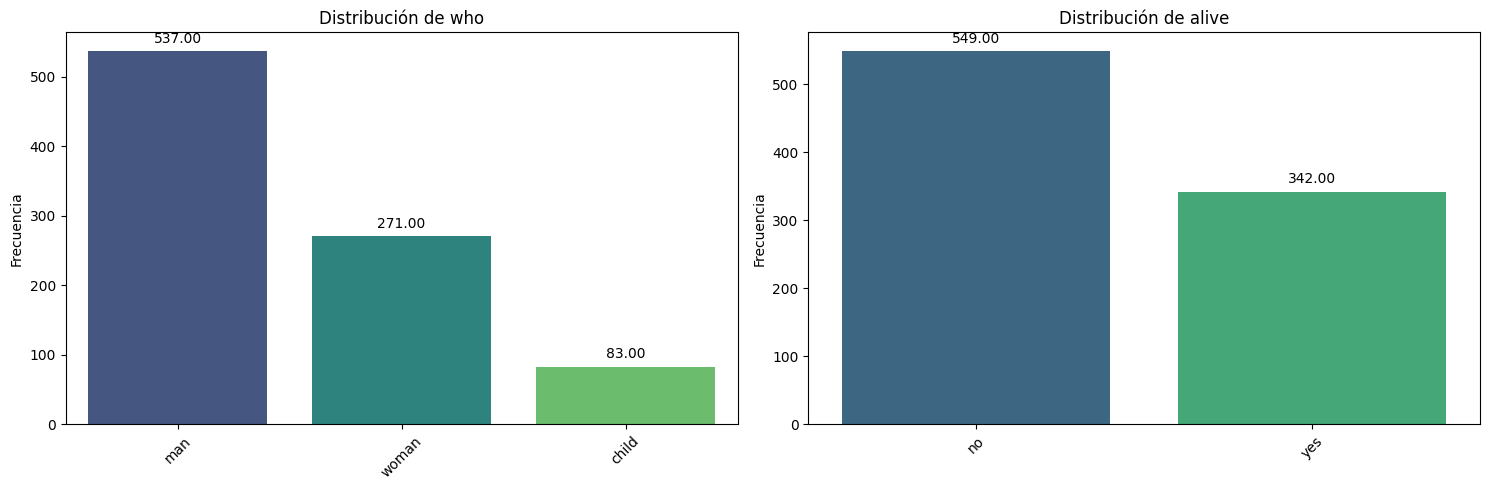

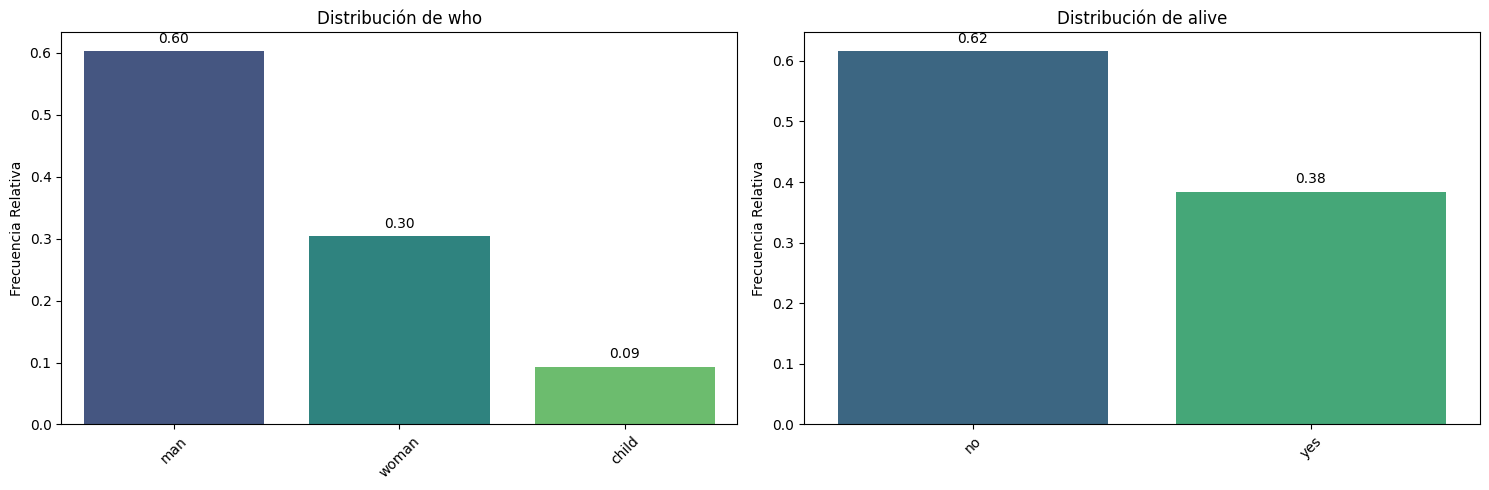

In [181]:
pinta_distribucion_categoricas(df,["who","alive"], mostrar_valores=True)
pinta_distribucion_categoricas(df,["who","alive"], relativa=True,mostrar_valores=True)

In [182]:
# Apartado 1
# Vemos distribuciones absolutas y relativas de las columnas alive y who en conjunto
frecuencias(df,["who","alive"])

Frecuencia Absoluta  Frecuencia Relativa
who   alive                                          
man   no                     449            50.392817
woman yes                    205            23.007856
man   yes                     88             9.876543
woman no                      66             7.407407
child yes                     49             5.499439
      no                      34             3.815937

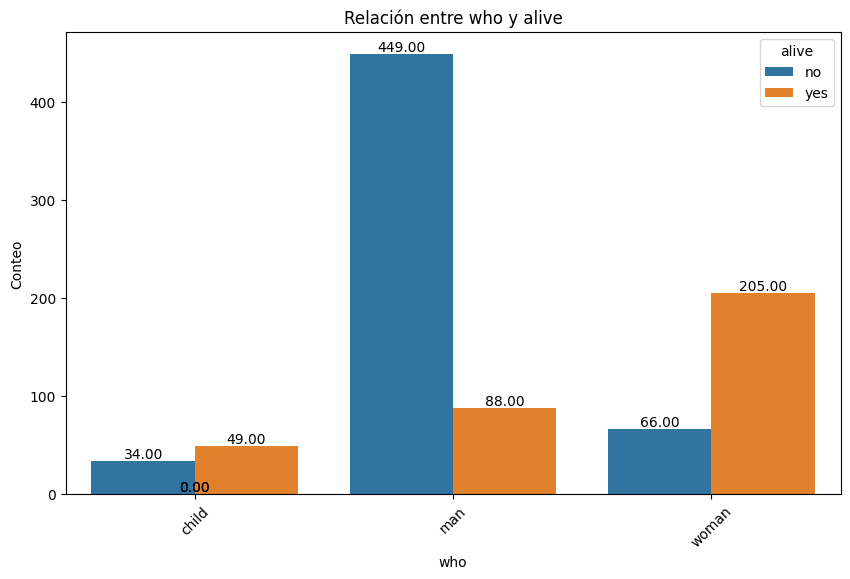

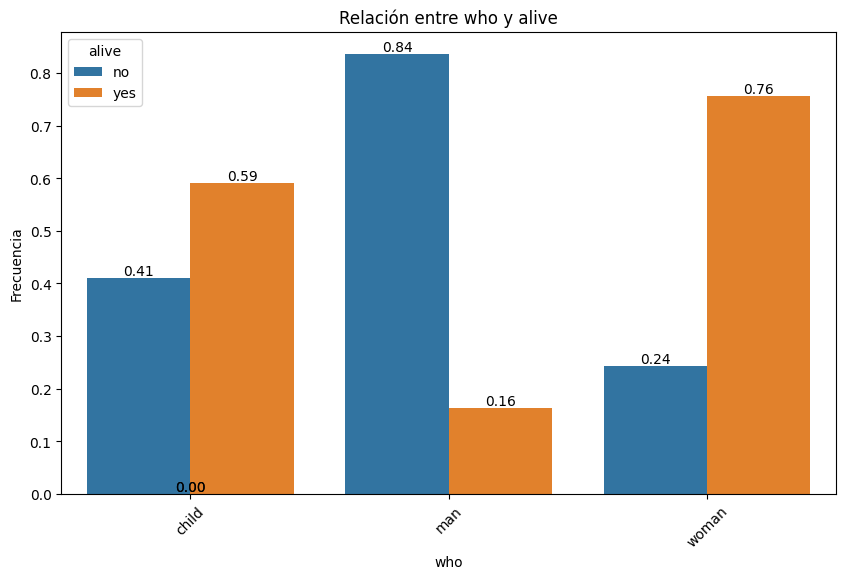

In [183]:
plot_categorical_relationship_fin(df,"who","alive",show_values=True)
plot_categorical_relationship_fin(df,"who","alive",relative_freq=True,show_values=True)

In [184]:
# Apartado 2
# Comparamos las columnas class y alive (ya la imprimimos antes)
frecuencias(df,"class")

,Frecuencia Absoluta,Frecuencia Relativa
class,,
Third,491,55.106622
First,216,24.242424
Second,184,20.650954


In [185]:
frecuencias(df,["class","alive"])

Frecuencia Absoluta  Frecuencia Relativa
class  alive                                          
Third  no                     372            41.750842
First  yes                    136            15.263749
Third  yes                    119            13.355780
Second no                      97            10.886644
       yes                     87             9.764310
First  no                      80             8.978676

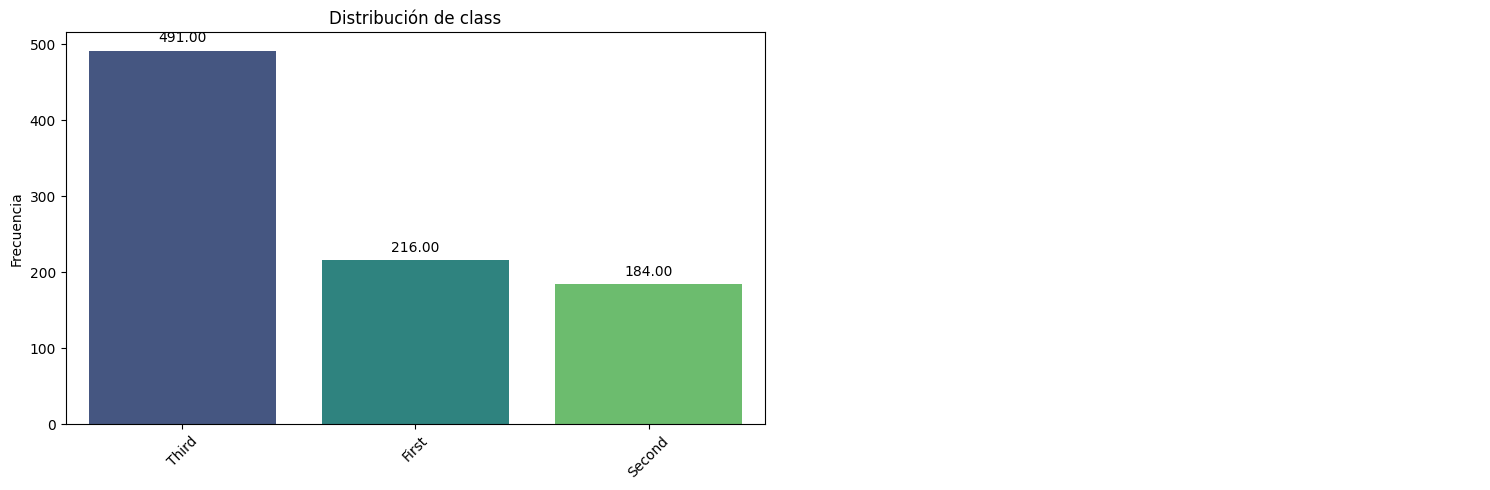

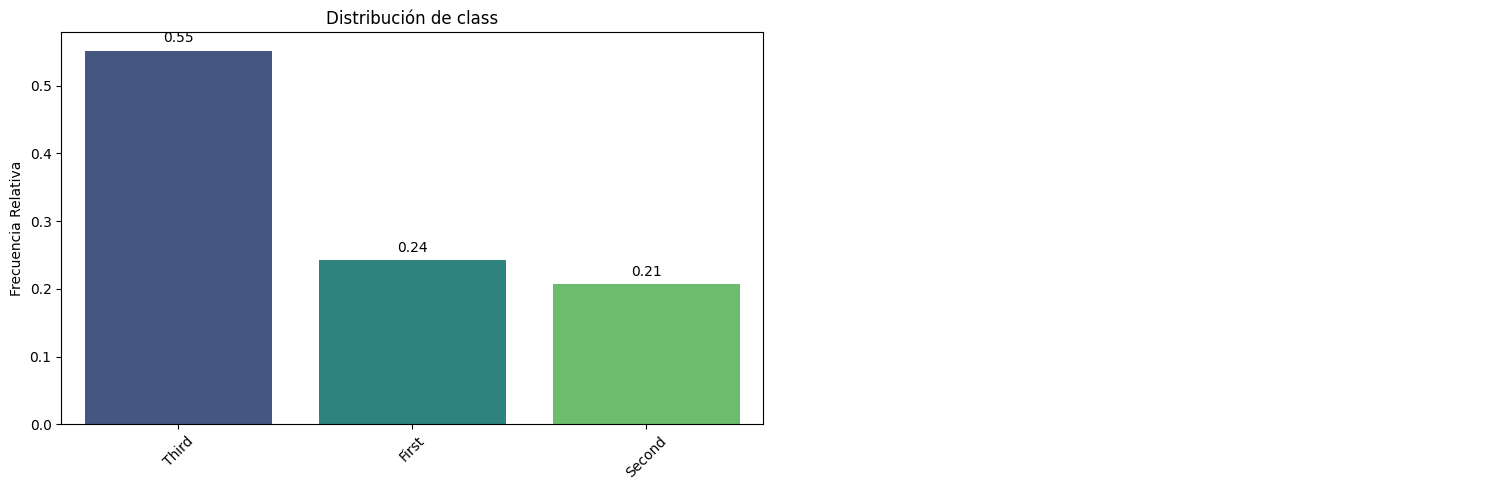

In [186]:
pinta_distribucion_categoricas(df,["class"], mostrar_valores=True)
pinta_distribucion_categoricas(df,["class"], relativa=True,mostrar_valores=True)

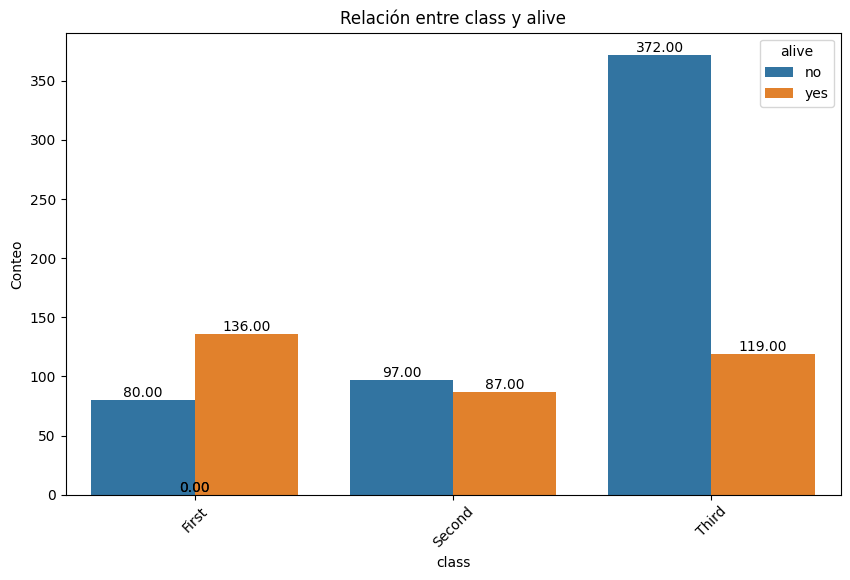

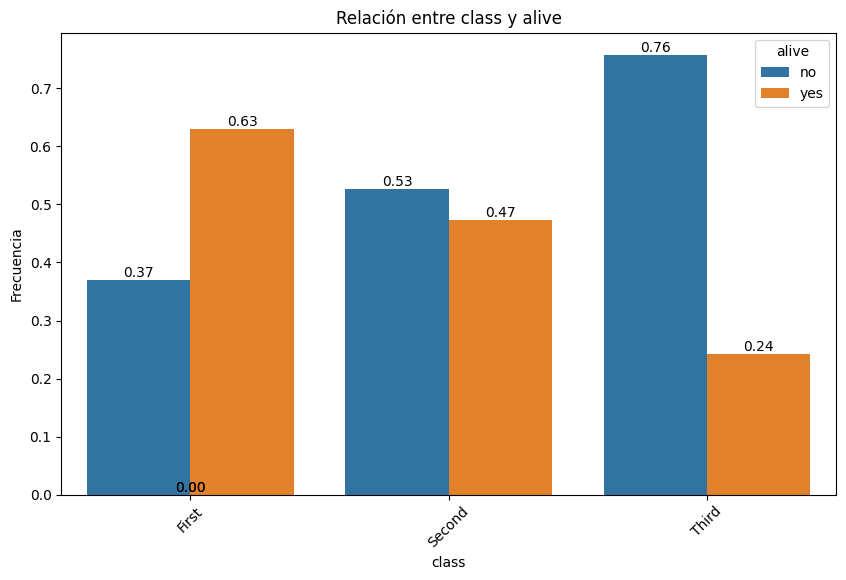

In [187]:
plot_categorical_relationship_fin(df,"class","alive",show_values=True)
plot_categorical_relationship_fin(df,"class","alive",relative_freq=True,show_values=True)

In [188]:
# Apartado 3
frecuencias(df,["embark_town","alive"])

Frecuencia Absoluta  Frecuencia Relativa
embark_town alive                                          
Southampton no                     427            47.923681
            yes                    219            24.579125
Cherbourg   yes                     93            10.437710
            no                      75             8.417508
Queenstown  no                      47             5.274972
            yes                     30             3.367003

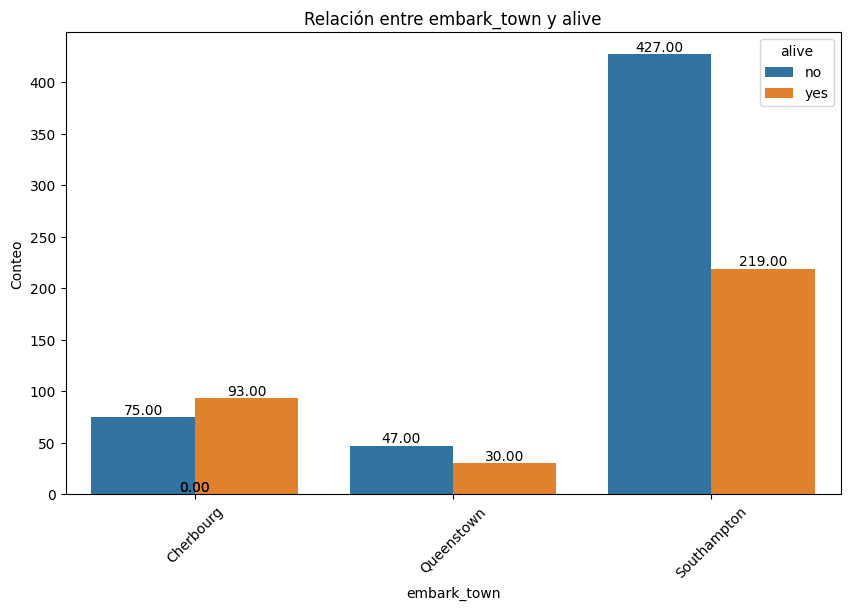

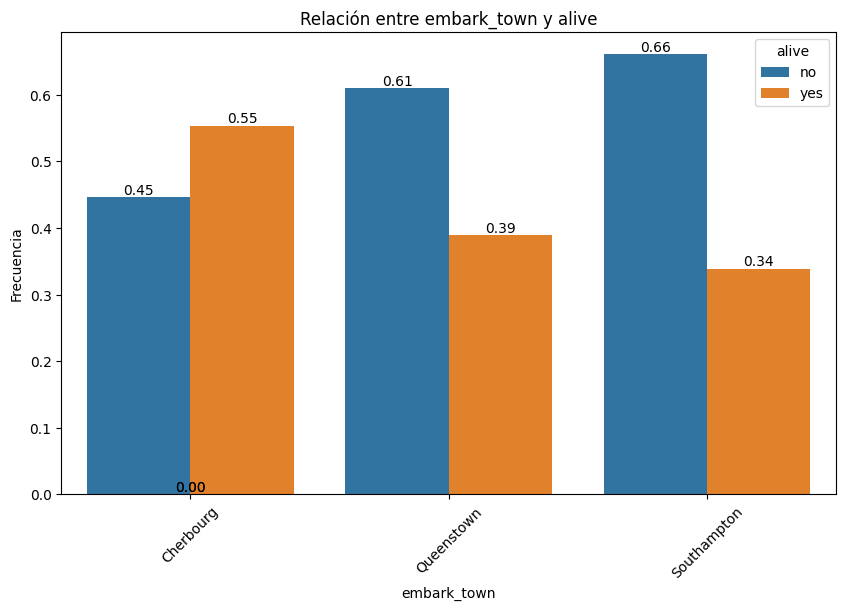

In [189]:
plot_categorical_relationship_fin(df,"embark_town","alive",show_values=True)
plot_categorical_relationship_fin(df,"embark_town","alive",relative_freq=True,show_values=True)

In [190]:
# Apartado 4,5
# Comparamos precio del billete fear y alive
frecuencias(df,"fare")

,Frecuencia Absoluta,Frecuencia Relativa
fare,,
8.0500,43,4.826038
13.0000,42,4.713805
7.8958,38,4.264871
7.7500,34,3.815937
26.0000,31,3.479237
...,...,...
35.0000,1,0.112233
28.5000,1,0.112233
6.2375,1,0.112233


(2,)


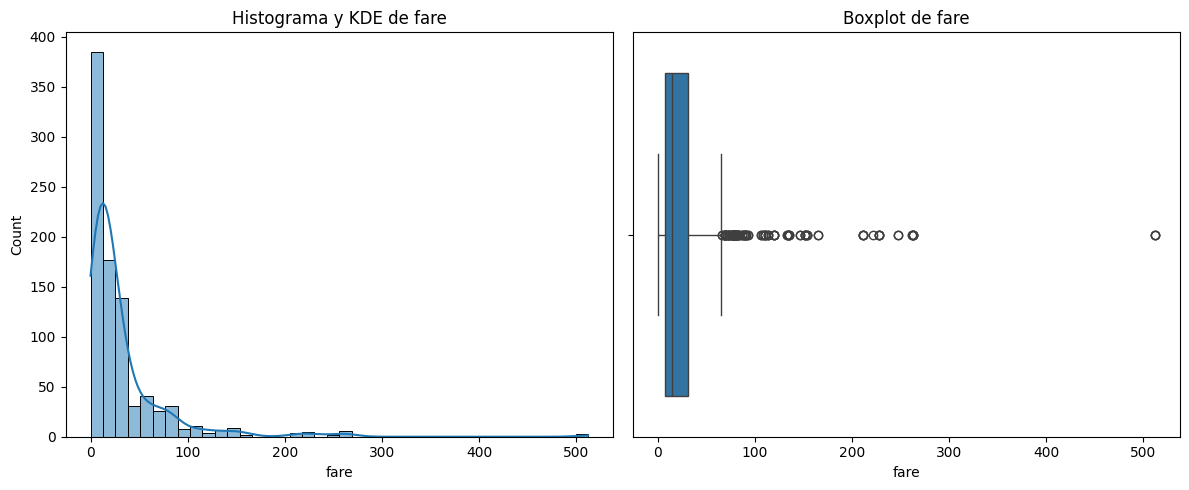

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: fare, dtype: float64

In [191]:
plot_combined_graphs(df,["fare"], bins=40)
df[df["alive"]=="yes"]["fare"].describe()

In [192]:
df[df["alive"]=="no"]["fare"].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: fare, dtype: float64

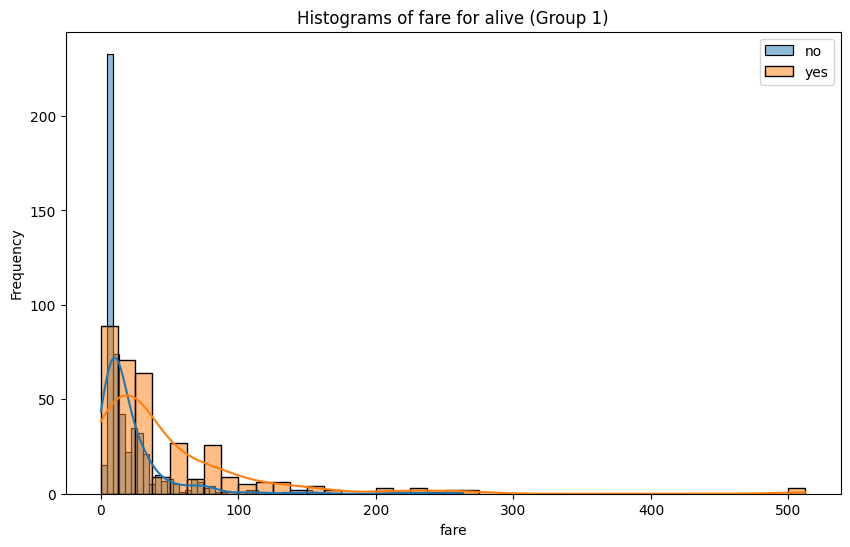

In [193]:
plot_grouped_histograms(df,"alive","fare",group_size=5)

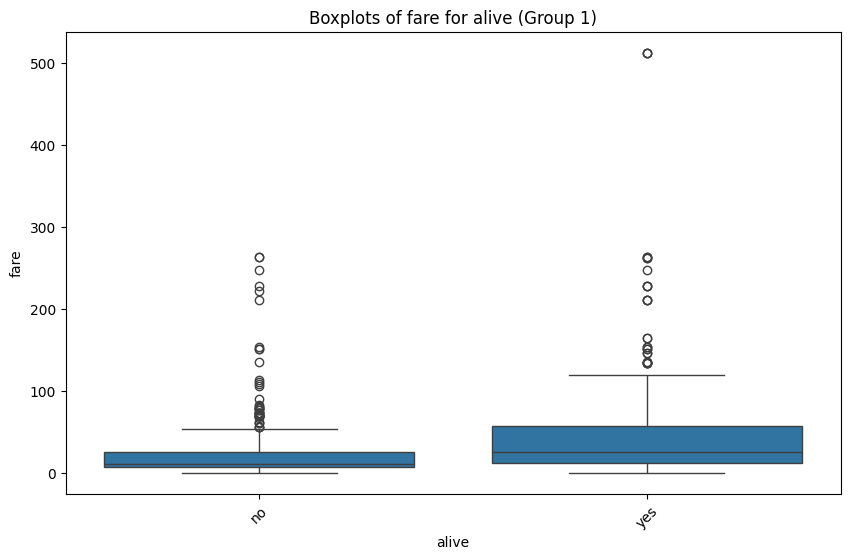

In [194]:
plot_grouped_boxplots(df, "alive","fare")

In [195]:
persona_mas_pago=df.loc[df["fare"]>512]
persona_mas_pago


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


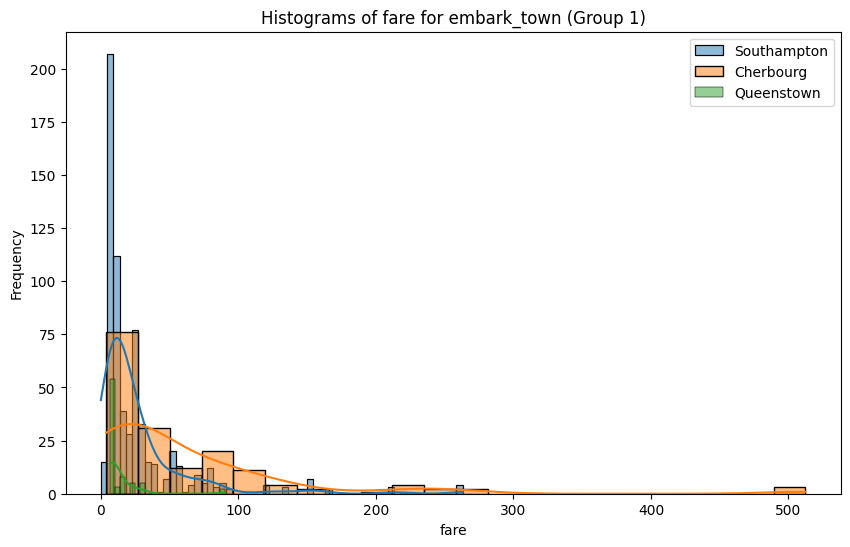

In [196]:
# Apartado 6
# Vemos la relacion entre fare, embark_town y alive
frecuencias(df,["fare","embark_town","alive"])
plot_grouped_histograms(df,"embark_town","fare", group_size=5)

In [197]:
df.loc[df["embark_town"]=="Southampton","fare"].describe()

count    646.000000
mean      27.243651
std       35.952905
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: fare, dtype: float64

In [198]:
df.loc[df["embark_town"]=="Queenstown","fare"].describe()

count    77.000000
mean     13.276030
std      14.188047
min       6.750000
25%       7.750000
50%       7.750000
75%      15.500000
max      90.000000
Name: fare, dtype: float64

In [199]:
df.loc[df["embark_town"]=="Cherbourg","fare"].describe()

count    168.000000
mean      59.954144
std       83.912994
min        4.012500
25%       13.697950
50%       29.700000
75%       78.500025
max      512.329200
Name: fare, dtype: float64

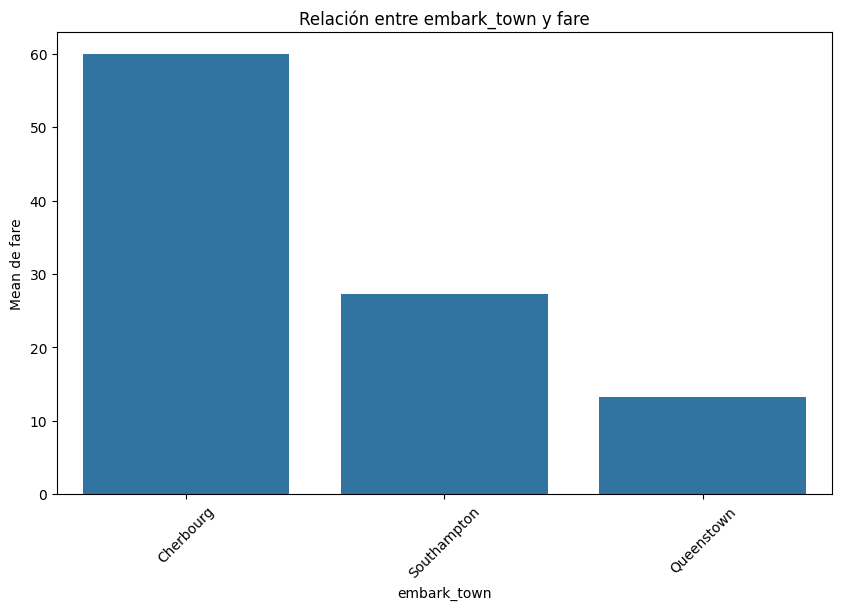

In [200]:
plot_categorical_numerical_relationship(df, "embark_town", "fare", show_values=False, measure='mean')

In [201]:
# Apartado 7
frecuencias(df,"class")

,Frecuencia Absoluta,Frecuencia Relativa
class,,
Third,491,55.106622
First,216,24.242424
Second,184,20.650954


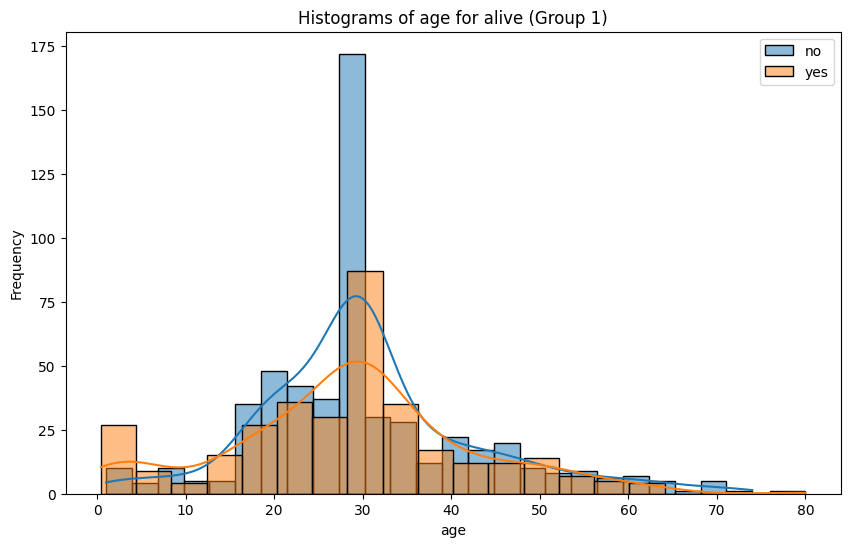

In [202]:
plot_grouped_histograms(df,"alive","age", group_size=5)

In [203]:
filtro1 = (df["class"] == "First") & (df["alive"] == "yes")
df.loc[filtro1, "age"].describe()

count    136.000000
mean      34.784706
std       13.141228
min        0.920000
25%       26.000000
50%       33.500000
75%       43.250000
max       80.000000
Name: age, dtype: float64

In [204]:
filtro2 = (df["class"] == "Second") & (df["alive"] == "yes")
df.loc[filtro2, "age"].describe()

count    87.000000
mean     26.076207
std      14.510690
min       0.670000
25%      18.000000
50%      28.000000
75%      34.000000
max      62.000000
Name: age, dtype: float64

In [205]:
filtro3 = (df["class"] == "Third") & (df["alive"] == "yes")
df.loc[filtro3, "age"].describe()

count    119.000000
mean      23.232941
std       10.922215
min        0.420000
25%       18.000000
50%       27.000000
75%       29.700000
max       63.000000
Name: age, dtype: float64

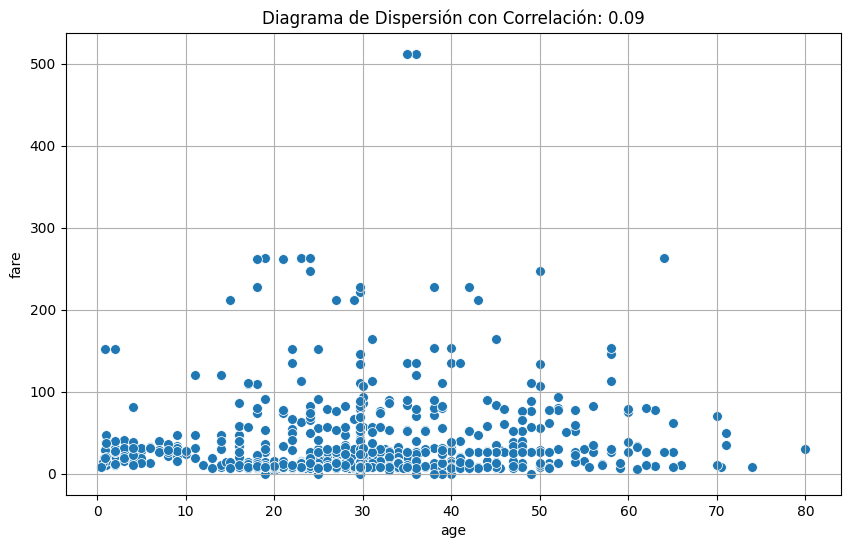

In [207]:
# Apartado 8
grafico_dispersion_con_correlacion(df,"age", "fare", tamano_puntos=50, mostrar_correlacion=True)

In [208]:
# Creamos una nueva columna por rangos de edad, niños de 0-15, adultos de 16-39, señores 41-59, mayores 60-90
cond_niño = (df["age"] >= 0) & (df["age"] <= 15)
cond_adulto = (df["age"] > 15) & (df["age"] <= 40)
cond_señor = (df["age"] > 40) & (df["age"] <= 60)
cond_mayor = (df["age"] > 60) & (df["age"] <= 90)

df["Rangos_Edad"] = ""

df.loc[cond_niño, "Rangos_Edad"] = "niño"
df.loc[cond_adulto, "Rangos_Edad"] = "adulto"
df.loc[cond_señor, "Rangos_Edad"] = "señor"
df.loc[cond_mayor, "Rangos_Edad"] = "mayor"

df["Rangos_Edad"].value_counts()


Rangos_Edad
adulto    658
señor     128
niño       83
mayor      22
Name: count, dtype: int64

In [209]:
[df.loc[df["Rangos_Edad"]=="niño", "fare"].describe().T,df.loc[df["Rangos_Edad"]=="adulto", "fare"].describe().T,df.loc[df["Rangos_Edad"]=="señor", "fare"].describe().T,df.loc[df["Rangos_Edad"]=="mayor", "fare"].describe().T]

[count     83.000000
 mean      32.785795
 std       33.466438
 min        7.225000
 25%       15.900000
 50%       26.250000
 75%       32.193750
 max      211.337500
 Name: fare, dtype: float64,
 count    658.000000
 mean      29.851043
 std       51.859780
 min        0.000000
 25%        7.895800
 50%       12.350000
 75%       26.550000
 max      512.329200
 Name: fare, dtype: float64,
 count    128.000000
 mean      42.348245
 std       45.009297
 min        0.000000
 25%       13.000000
 50%       26.550000
 75%       56.157300
 max      247.520800
 Name: fare, dtype: float64,
 count     22.000000
 mean      41.371214
 std       54.783357
 min        6.237500
 25%       10.500000
 50%       26.550000
 75%       45.791700
 max      263.000000
 Name: fare, dtype: float64]

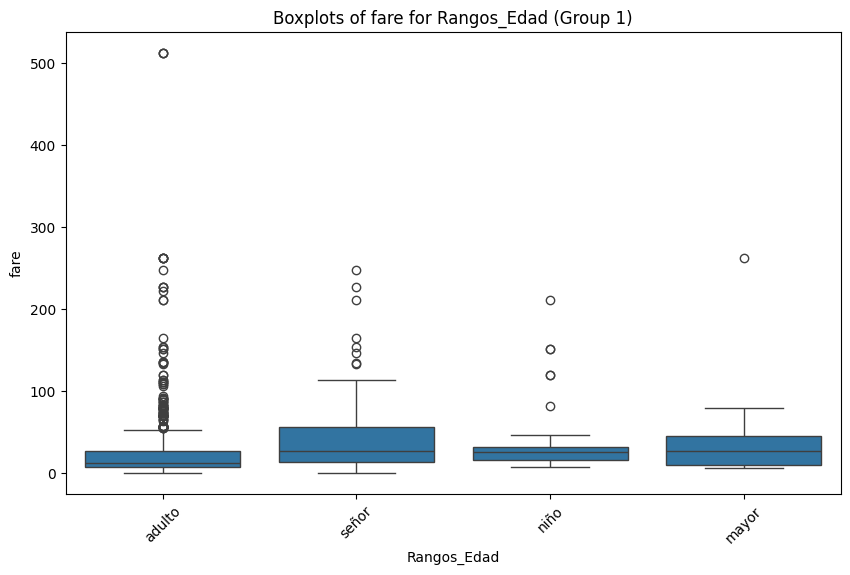

In [210]:
plot_grouped_boxplots(df,"Rangos_Edad", "fare")

In [211]:
# Respuesta a los apartados

### Apartado 1
1. En terminos absolutos sobrevivieron más mujeres 205, despues 88 hombres y por ultimo 49 niños   
1. En terminos relativos el orden cambia, ya que proporcionalmente sobrevivieron más mujeres 76%, después niños 59% y por ultimo hombres 16%.  
1. Sí, los datos demuestran que los hombres, que eran el 60% de los pasajeros del barco, murieron algo más de la mitad, 50.4% en comparacion con las mujeres que fallecieron 7.4% y niños 3.8%     
1. Los niños, fue el colectivo que menos perdidas tuvo, 3.8% frente al 57.8% de adultos que fallecieron    

### Apartado 2
2. En terminos absolutos sobrevivieron más pasajeros de primera clase 136 personas.
2. En terminos relativos tambíen son los de primera clase los que más personas tienen que sobrevivieron, un 15.3% del total de pasajeros.
2. Parece que sí, los que eran de primera clase sobrevivieron más en valores absolutos y relativos que los de segunda y tercera.

### Apartado 3
3. De Southampton, 219 personas.
3. De Cherbourg, el 55% de pasajeros de alli sobrevivieron.
3. La mayoria de pasajeros embarcaron al inicio del viaje en Southampton y es por eso, el 47.9% del total de pasajeros fallecidos eran de alli. Por otra parte en Queenstown solo embarcaron 77 personas y por eso su valor relativo de fallecidos es de un 8.4%. Sí que hay relación.

### Apartado 4
4. Parace que las personas que se salvaron pagaron más que los que no se salvaron. La media de precio del billete para el sí es de 48 mientras que los que no sobrevivieron es de 22. Además por el tamaño de las cajas y su posicion superior en todos los cuartiles, podemos decir que los que sobrevivieron pagaron más por sus billetes.
Tambien podemos ver outliers en ambos casos.

### Apartado 5
5. Podemos suponer que eran trabajadores o que son datos que se rellenaron con 0 porque no tenían ese dato al rellenar el conjunto
Las personas que mas pagaron fueron 3 que embarcaron en Cherbourg, viajaron en primera clase, alguno con familiares, otros 2 no y afortunadamente sobrevivieron.

### Apartado 6
6. A la vista de los gráficos podemos sacar que de media el pasajero de Southampton pagó 27.24 libras, el de Queenstown pago 13.27 y el de Cherbourg casi 60. Una diferencia mayor que la suma de los 2 anteriores. Este dato
junto con los obtenidos previamente, nos hacen pensar que los pasajeros que más pagaron, fueron los de Cherbourg, que tambien fue el colectivo que mayor tasa de supervivencia tuvo.
En el caso de Queenstown, que fue el siguiente colectivo que más sobrevivio, tenemos una poblacion pequeña y sus datos no siguen la tendencia anterior, ya que fue el segundo grupo que más pago.
Para los de Southampton, segundos que mas pagaron de media, su destino fue el más trágico ya que su porcentaje de fallecidos fue el mayor.

### Apartado 7
7. Viendo la media de edad por clase de las personas que sobrevivieon tenemos que para First=34.78 años, Second=26.07 y Third= 23.23. Y en terminos absolutos y relativos sobrevivió más la clase primera que es la agrupacion de mayor edad

### Apartado 8
8. En general para los 4 bloques de edades que tenemos el precio del billete va aumentando (niño, adulto, señor y mayor) con la excepcion en adulto ya que muchos de ellos pagaron 0 euros de billete, por ser trabajadores o el motivo que fuese. Por el diagrama de cajas apreciamos que el tamaño de ellas y sus bigotes aumentan con la edad, es decir pagan más y con más dispersion. Y respecto a la tasa de supervivencia el colectivo adulto es que más se vio afectado

In [212]:
# Fin de las respuestas

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [213]:
df_air_jun=pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


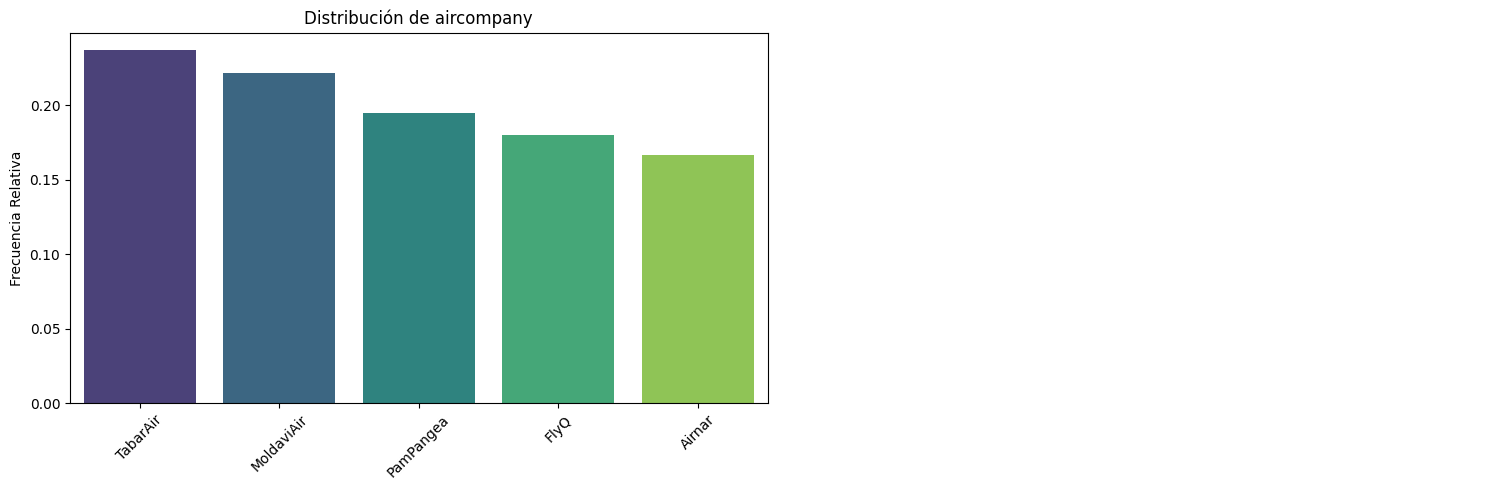

In [214]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

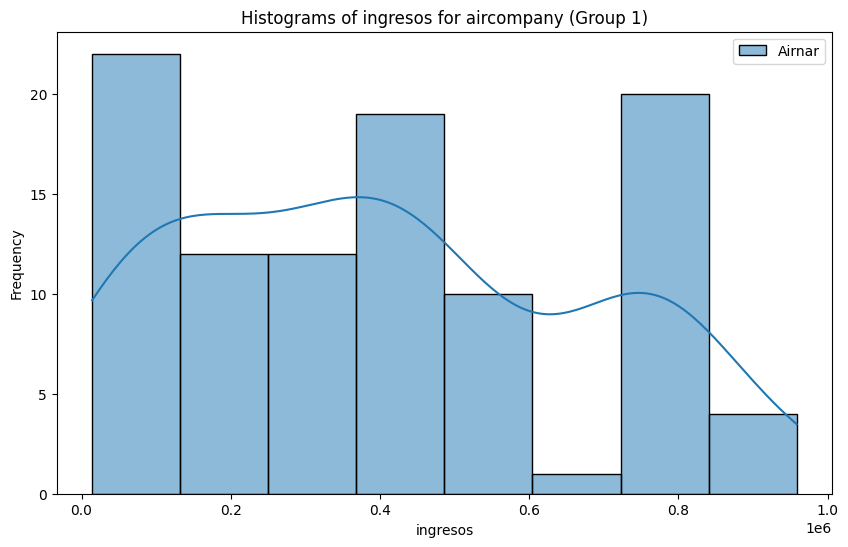

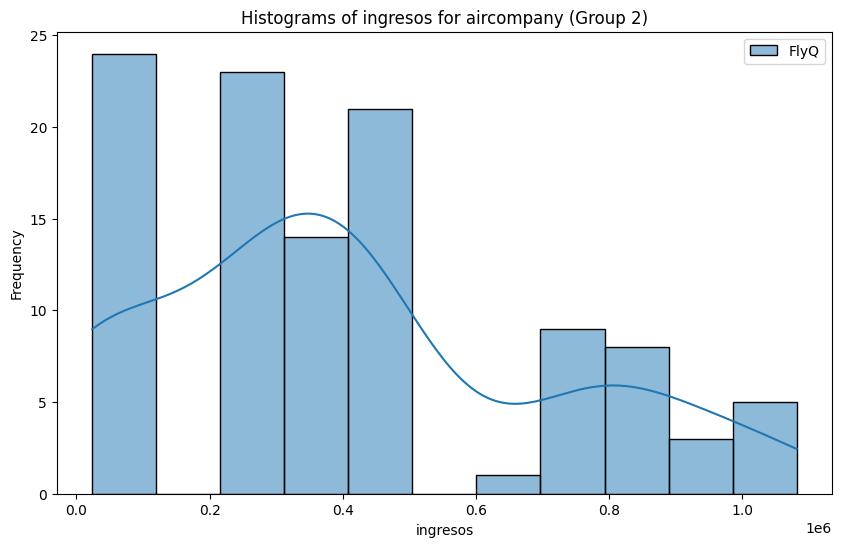

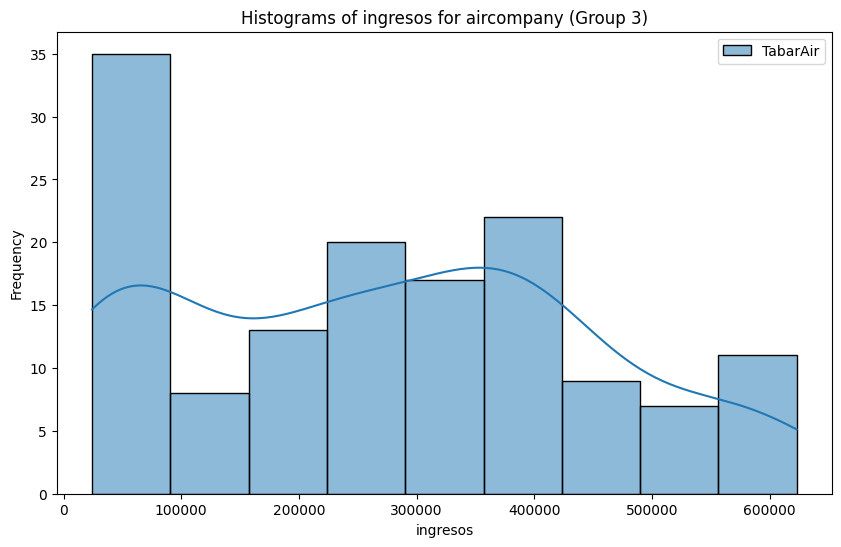

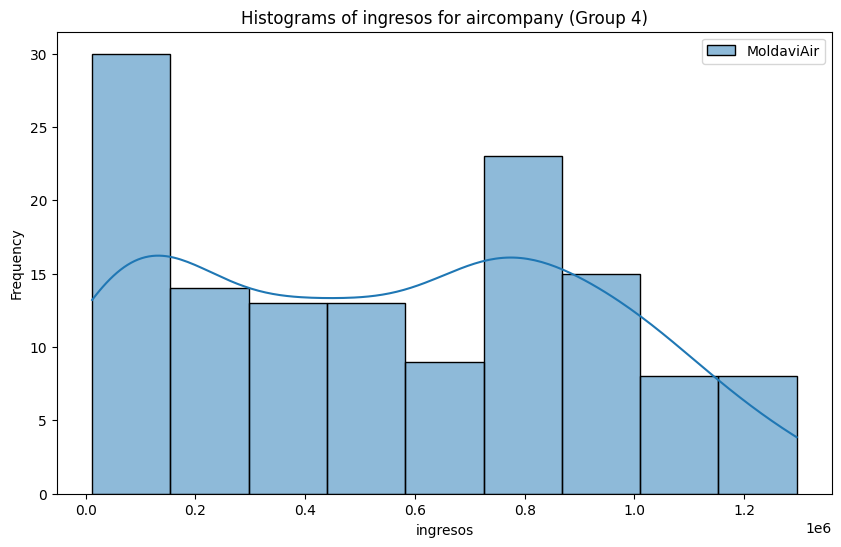

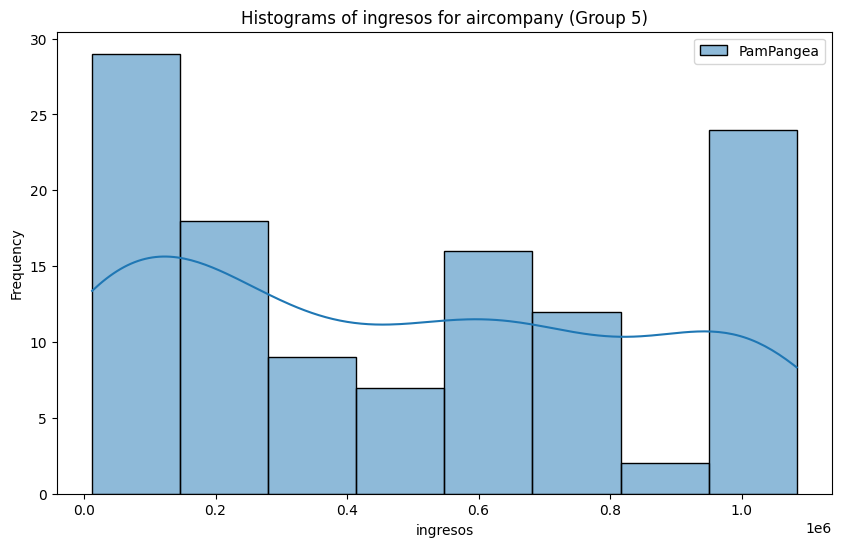

In [215]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 1)

In [216]:
grupos = df_air_jun['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_air_jun[df_air_jun['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista

airnair=ingresos_por_company[0].describe()
flyq=ingresos_por_company[1].describe()
tabanair=ingresos_por_company[2].describe()
moldavair=ingresos_por_company[3].describe()
pampan=ingresos_por_company[4].describe()

print(airnair,flyq,tabanair,moldavair,pampan, sep="\n")

count       100.00000
mean     405293.97820
std      269583.84842
min       14232.65000
25%      185270.60000
50%      396764.22000
75%      608356.12250
max      958617.02000
Name: ingresos, dtype: float64
count    1.080000e+02
mean     4.016190e+05
std      2.956337e+05
min      2.349834e+04
25%      2.375570e+05
50%      3.669707e+05
75%      4.739014e+05
max      1.081703e+06
Name: ingresos, dtype: float64
count       142.000000
mean     271042.230282
std      177006.035877
min       24289.530000
25%       95620.507500
50%      258379.745000
75%      398147.192500
max      623089.410000
Name: ingresos, dtype: float64
count    1.330000e+02
mean     5.480772e+05
std      3.745778e+05
min      1.179785e+04
25%      1.788729e+05
50%      5.324262e+05
75%      7.940554e+05
max      1.295516e+06
Name: ingresos, dtype: float64
count    1.170000e+02
mean     4.784170e+05
std      3.644581e+05
min      1.238321e+04
25%      1.631245e+05
50%      4.426685e+05
75%      7.630790e+05
max      1

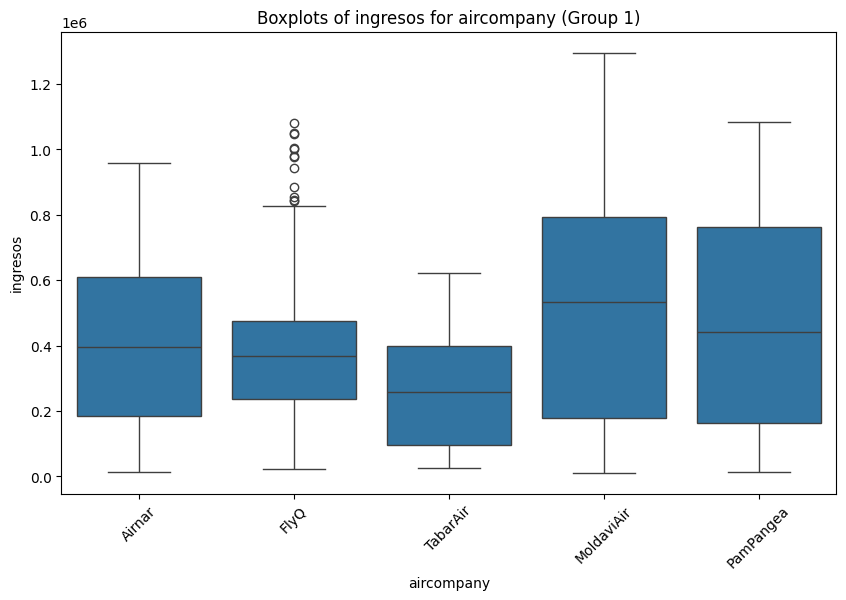

In [217]:
plot_grouped_boxplots(df_air_jun,"aircompany", "ingresos")

* Por los datos obtenidos tenemos que nuestra compañia es la que menos ingresa y la que mas vuelo realiza (142 vuelos y  271.000 de beneficio). Algo mal estamos haciendo

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

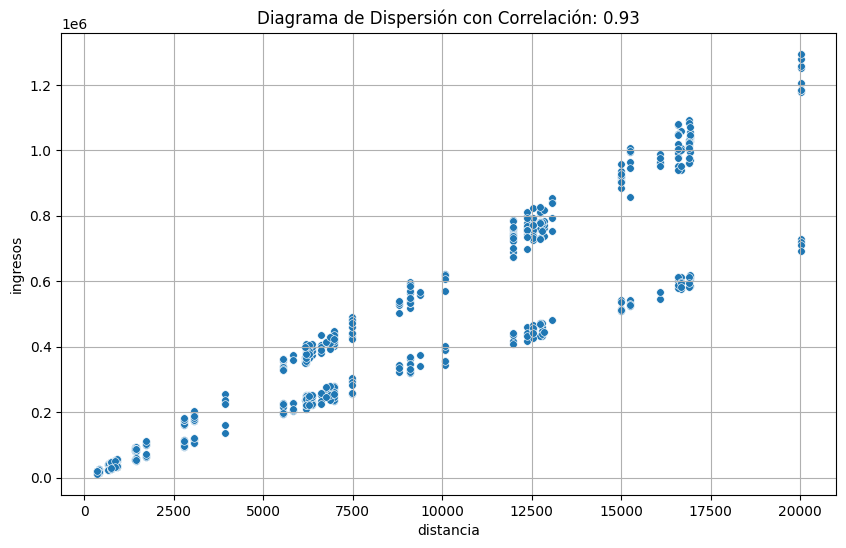

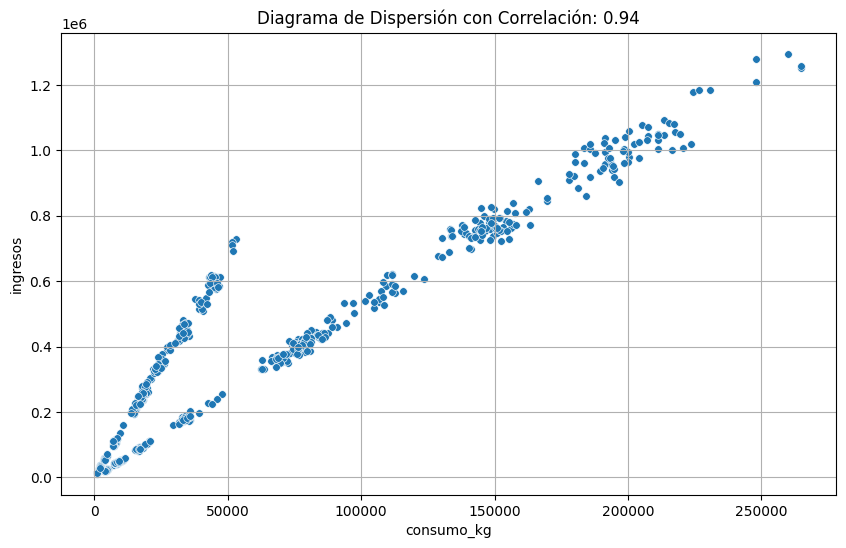

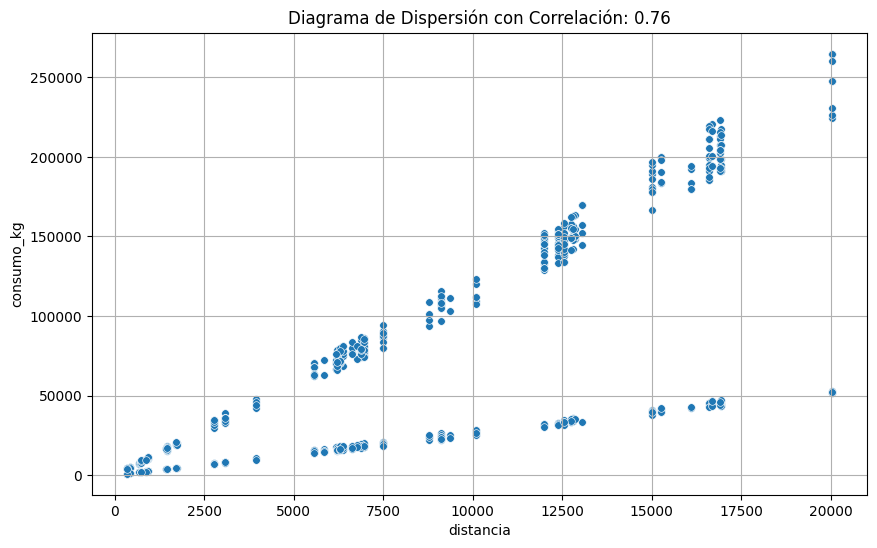

In [218]:
# El analisis lo realizaremos con variables 1 a 1
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

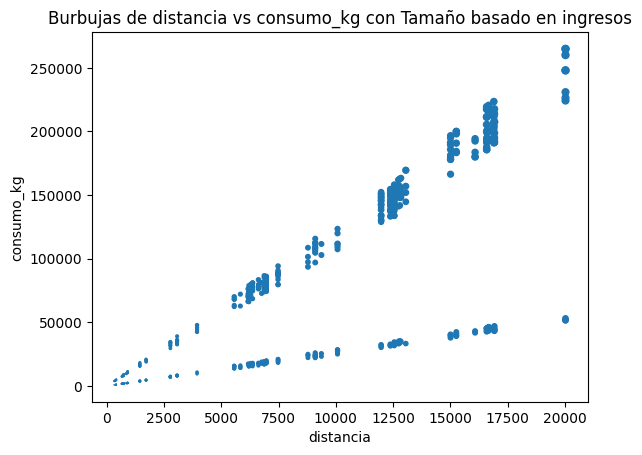

In [219]:
# para ver las 3 variables juntas usamos un grafico de burbujas
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 50000)

In [220]:
# creamos una nueva categoria "Consumo/distancia" para dividir en 2 grupos los vuelos
df_air_jun["consumo/distancia"]=df_air_jun["consumo_kg"]/df_air_jun["distancia"]

df_air_jun["consumo/distancia"]

0       2.502900
1       2.628288
2      12.022400
3       2.673000
4      11.512800
         ...    
595     2.653560
596    11.906800
597     2.478600
598    11.086400
599    11.299600
Name: consumo/distancia, Length: 600, dtype: float64

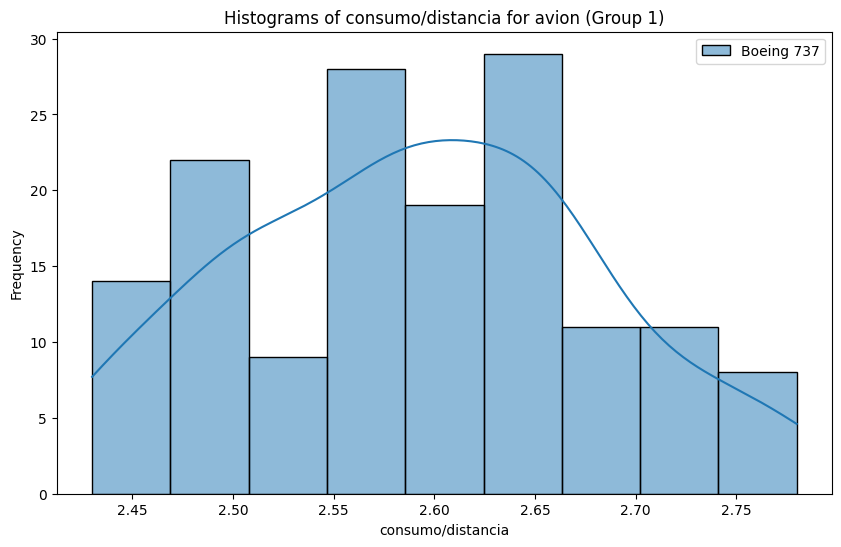

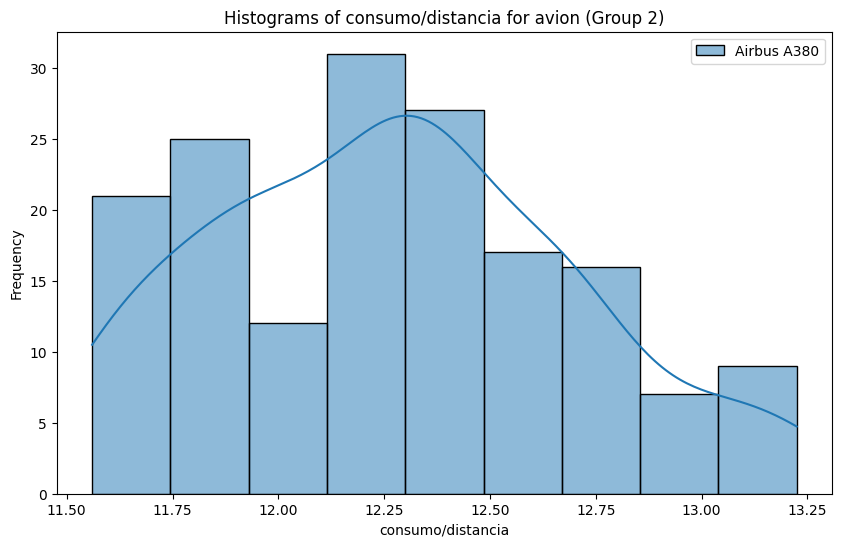

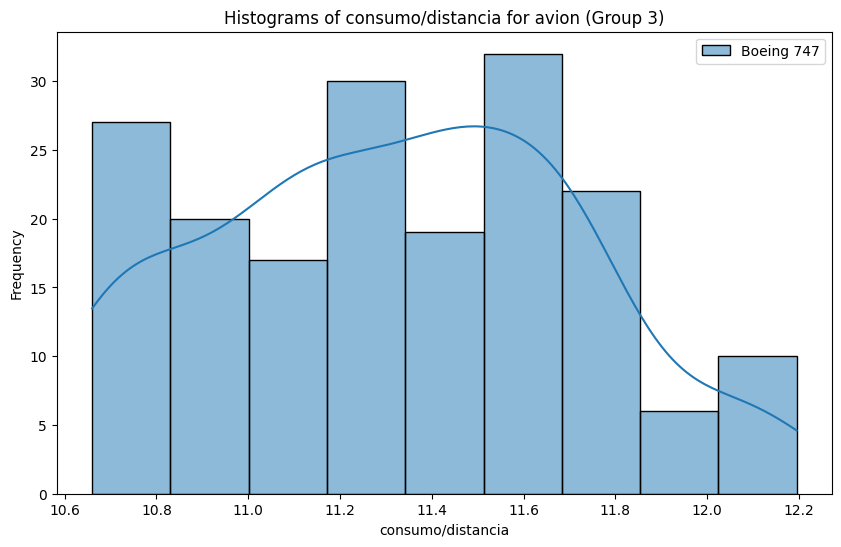

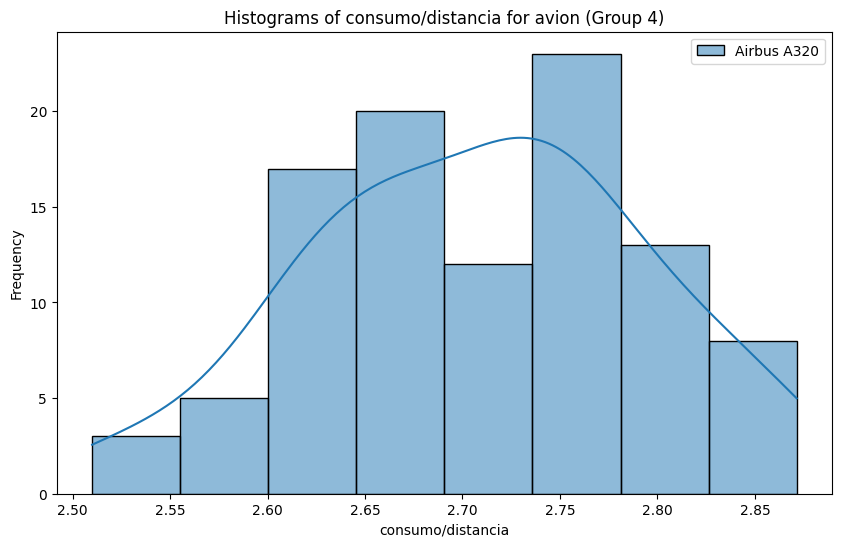

In [221]:
plot_grouped_histograms(df_air_jun, "avion","consumo/distancia",group_size= 1)

In [222]:
# Hago categorias por eficiencia
df_air_jun.loc[(df_air_jun["avion"]=="Boeing 737")|(df_air_jun["avion"]=="Airbus A320"),"Aviones_Eficientes"]="Eficiente"
df_air_jun.loc[(df_air_jun["avion"]=="Boeing 747")|(df_air_jun["avion"]=="Airbus A380"),"Aviones_Eficientes"]="No_Eficiente"

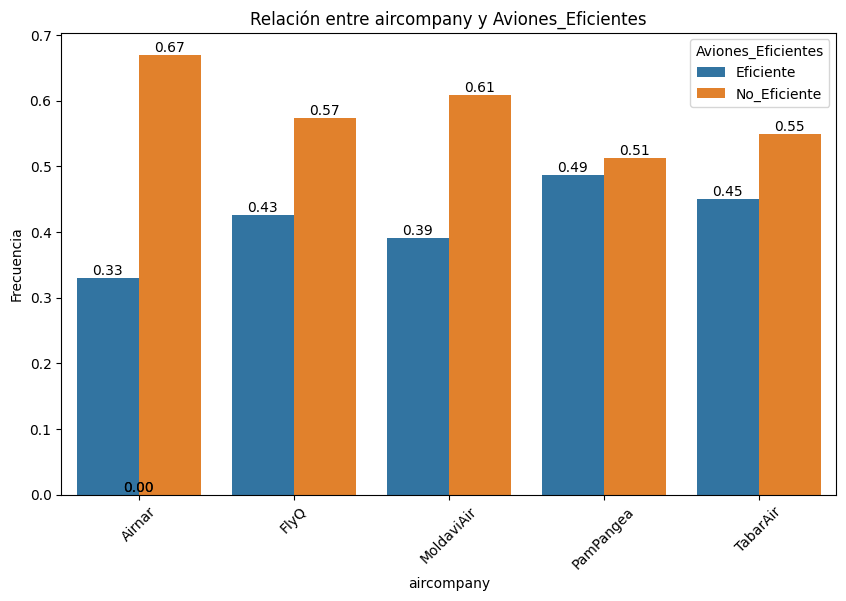

In [223]:
plot_categorical_relationship_fin(df_air_jun,"aircompany","Aviones_Eficientes",show_values=True, relative_freq=True)

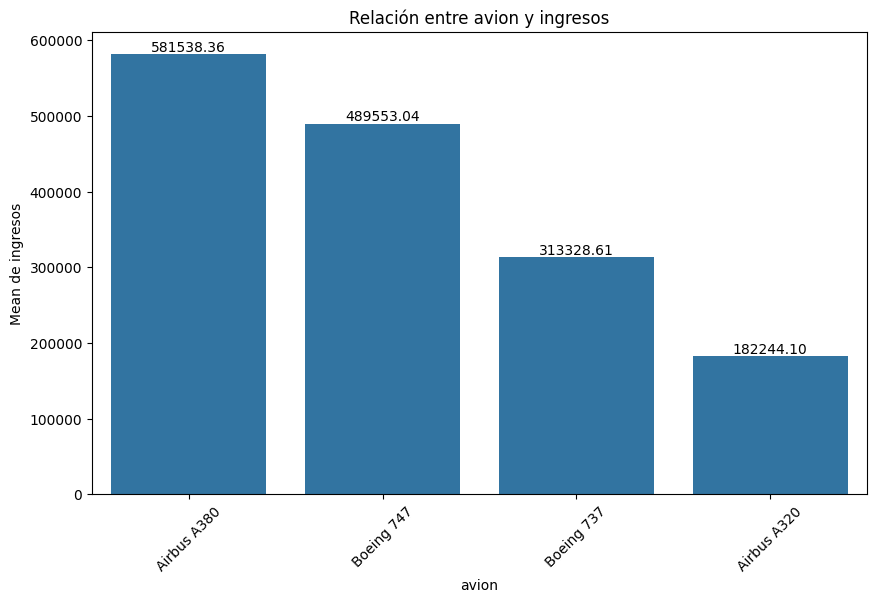

In [224]:
plot_categorical_numerical_relationship(df_air_jun,"avion","ingresos",show_values=True)

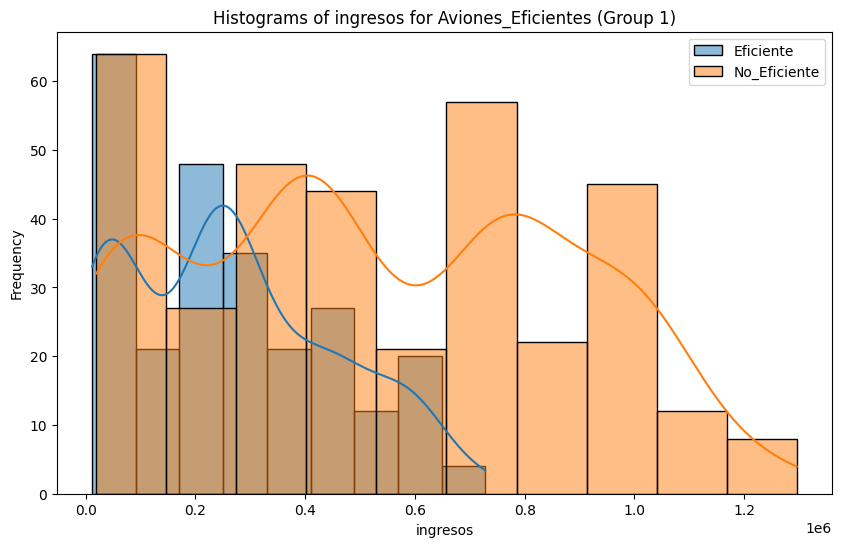

In [225]:
plot_grouped_histograms(df_air_jun,"Aviones_Eficientes","ingresos",group_size=4)

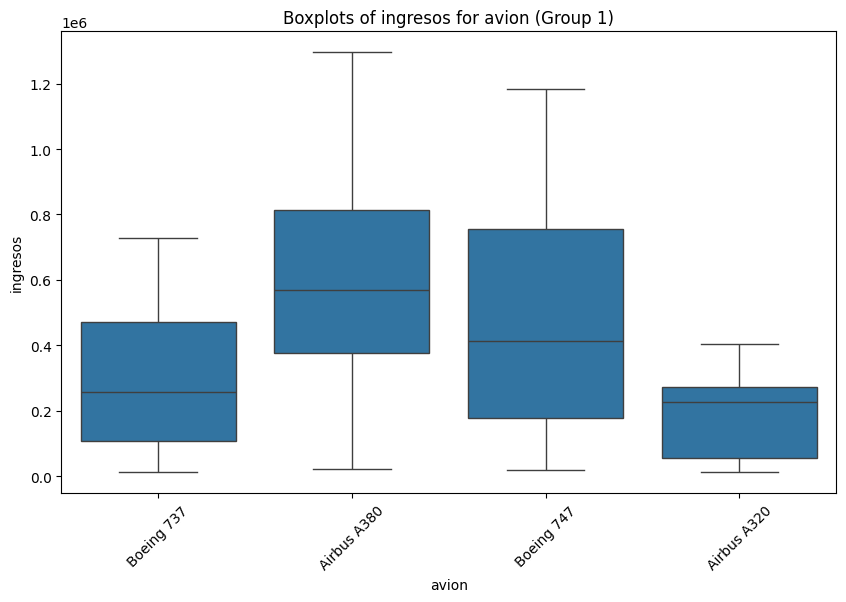

In [226]:
plot_grouped_boxplots(df_air_jun,"avion","ingresos")

* Se aprecia dos lineas claramente diferenciadas, que sugieren que hay vuelos mas eficientes y que por su parte generan mayores ingresos por distancia.
* Estos vuelos eficientes aparecen para compañias que usan aviones AirbusA320 y Boeing737
* TabarAir es de las compañias que mas aviones usan que son eficientes (en valores absolutos), pero la mayor parte de ingresos, mas del doble, la generan los aviones que NO son eficientes, es por eso que es la ultima compañia del mercado.
* Habría que valorar, según los datos, si hacer vuelos mas contaminantes, pero de más distancia, para mejorar los resultados.

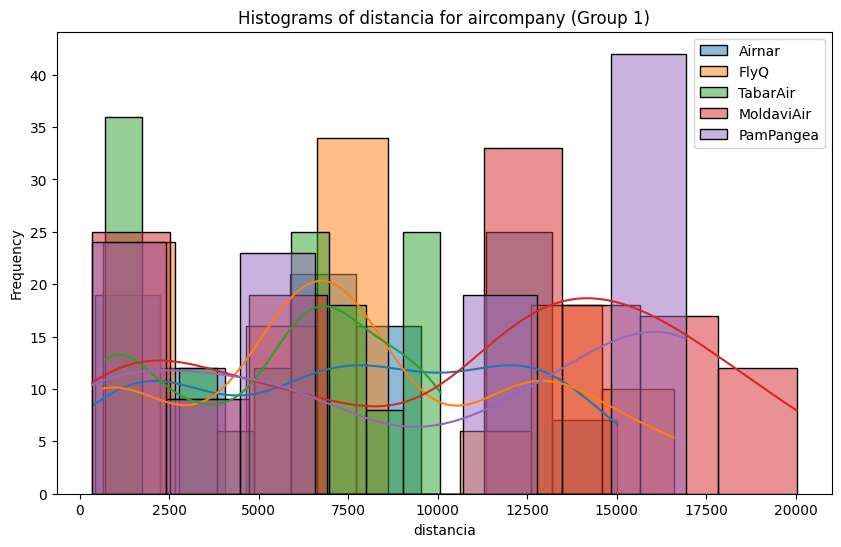

In [227]:
plot_grouped_histograms(df_air_jun, "aircompany","distancia",group_size= 5)

Recordamos lo anterior:
"El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros. 

Pero ahí no acaba el análisis. El siguente paso sería escoger una de las tres, hacerle un *binning* o convertirla a categórica y estaríamos en el análisis multivariante explicado en la sesión anterior. Este caso lo veremos en los ejercicios"

In [228]:
# Vamos a hacer de distancia una nueva categoria por tramos, corta, media, larga y muy larga
cond_baja = (df_air_jun["distancia"] >= 0) & (df_air_jun["distancia"] <= 5000)
cond_media = (df_air_jun["distancia"] > 5000) & (df_air_jun["distancia"] <= 10000)
cond_larga = (df_air_jun["distancia"] > 10000) & (df_air_jun["distancia"] <= 15000)
cond_muylarga = (df_air_jun["distancia"] > 15000) & (df_air_jun["distancia"] <= 25000)

df_air_jun["Rangos_Dist"] = ""

df_air_jun.loc[cond_baja, "Rangos_Dist"] = "1_baja"
df_air_jun.loc[cond_media, "Rangos_Dist"] = "2_media"
df_air_jun.loc[cond_larga, "Rangos_Dist"] = "3_larga"
df_air_jun.loc[cond_muylarga, "Rangos_Dist"] = "4_muy larga"

df_air_jun["Rangos_Dist"].value_counts()


Rangos_Dist
2_media        204
1_baja         176
3_larga        114
4_muy larga    106
Name: count, dtype: int64

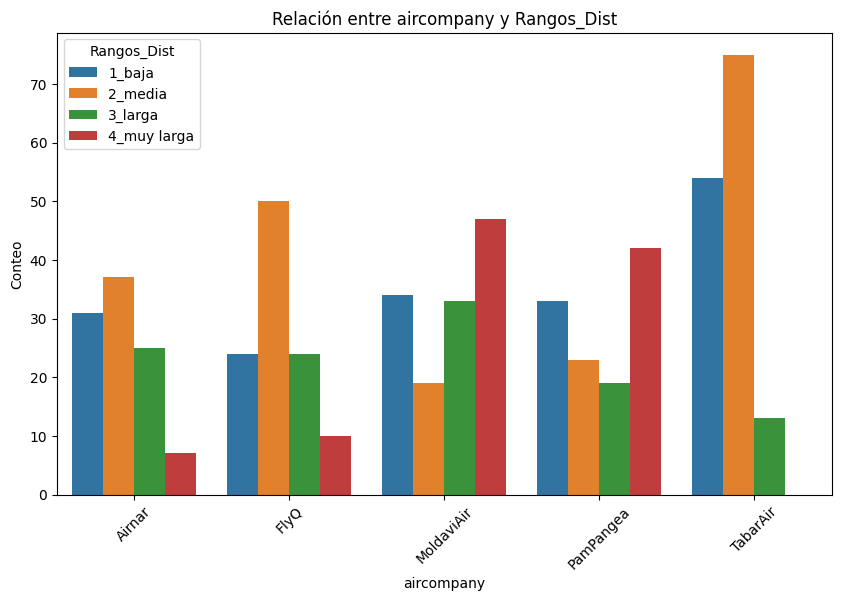

In [229]:
plot_categorical_relationship_fin(df_air_jun,"aircompany","Rangos_Dist")

* Vemos que Moldavair, que es la compañia que más ingresa, es la que más vuelos de muy larga distancia tiene y tambien la que mas vuelos de larga distancia.
* En el caso de TabarAir, al tener pocos vuelos de larga distancia y ninguno de muy larga distancia supone un bajon en los ingresos, aun siendo la compañia que mas vuelos tiene de baja y media distancia y en general que mas vuelos opera.
* Pampangea seria la siguiente despues de Moldavair en ingresos y en vuelos de muy larga distancia, seguido de Airnair ligeramente superior en ingresos que FlyQ.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.